## Linear model is surprisingly poor.  Revisit to see if this points to a problem in the workflow.

In [1]:
from BorderModel import BorderData, clean_df_subset
from dbhelper import pd_query
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV

In [3]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 1
            and (minute = 0 or minute = 30)
        order by c.date
        '''

df = pd_query(query)

** MSE for last cv fold **
Baseline :  107.994317561
Model    :  173.881038876
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.374934427889
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.027142867455


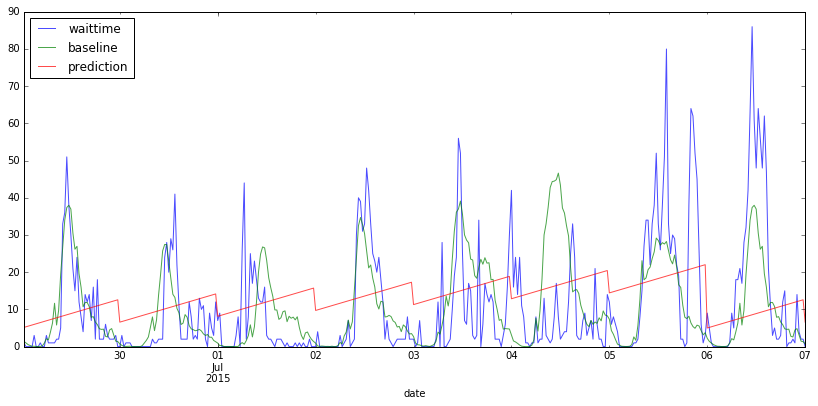

In [4]:
dfnew = clean_df_subset(df, ['dayofweek', 'minofday'])
data = BorderData(dfnew, years=6)
model = LinearRegression(normalize=True, n_jobs=-1)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('6/29/15', '7/7/15');

** MSE for last cv fold **
Baseline :  107.994317561
Model    :  173.881038876
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.374934427889
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.027142867455


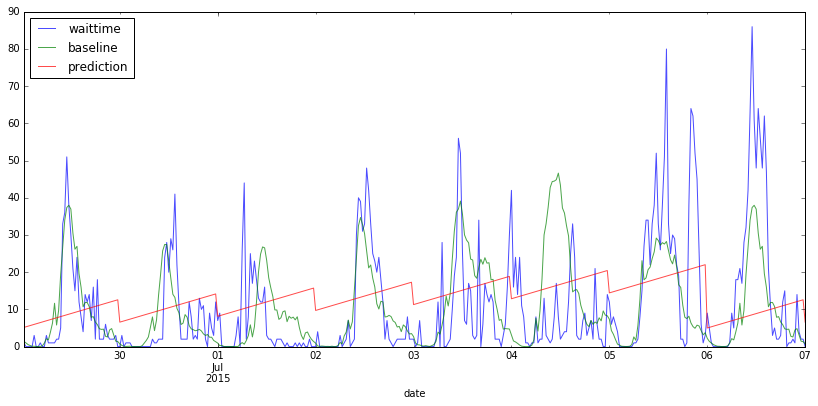

In [5]:
dfnew = clean_df_subset(df, ['dayofweek', 'minofday'])
data = BorderData(dfnew, years=2)
model = LinearRegression(normalize=True, n_jobs=-1)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid.best_estimator_)
data.print_metrics(grid.best_estimator_)
data.plot('6/29/15', '7/7/15');

** MSE for last cv fold **
Baseline :  107.994317561
Model    :  173.881038876
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.374934427889
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.027142867455


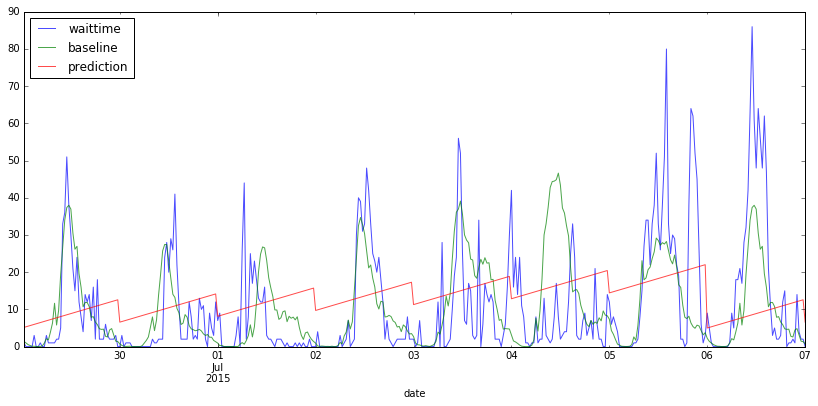

In [18]:
dfnew = clean_df_subset(df, ['dayofweek', 'minofday'])
data = BorderData(dfnew, years=5)
model = LinearRegression(normalize=True, n_jobs=-1)
model.fit(data.X_train, data.y_train)
data.predict(model)
data.print_metrics(model)
data.plot('6/29/15', '7/7/15');

** MSE for last cv fold **
Baseline :  107.994317561
Model    :  128.024088138
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.0123284719149
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  0.0139425208997


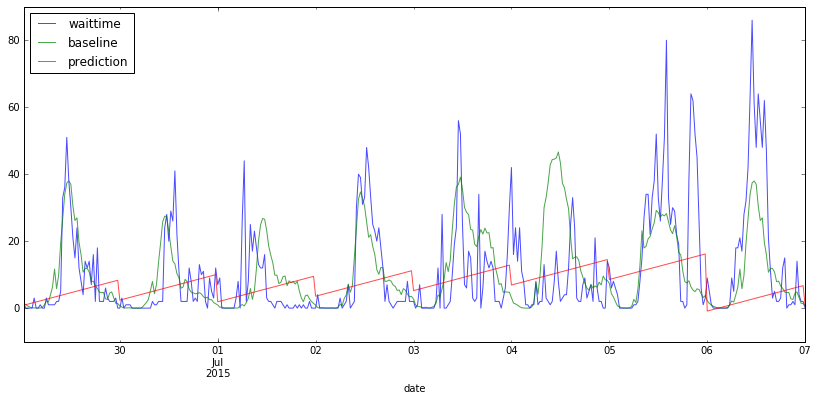

In [42]:
data = BorderData(df, years=4)
model = LinearRegression(normalize=True, n_jobs=-1)
model.fit(data.X_train, data.y_train)
data.predict(model)
data.print_metrics(model)
data.plot('6/29/15', '7/7/15');

## Linear model is insensitive to settings.  Suspicious, but since there are only 2 features, the linear model should not be expected to do better.

## Another approach is to break each feature into more discrete features

In [63]:
dfnew = clean_df_subset(df, ['dayofweek', 'minofday'])

In [64]:
dfnew = dfnew.join(pd.get_dummies(df.minofday, prefix='mod'))
dfnew = dfnew.join(pd.get_dummies(df.dayofweek, prefix='dow'))

** MSE for last cv fold **
Baseline :  107.994317561
Model    :  179.059317765
** R^2 for last cv fold **
Baseline :  0.146053496169
Model    :  -0.415880778148
** Explained variance for last cv fold **
Baseline :  0.282901756576
Model    :  -0.0115868282925


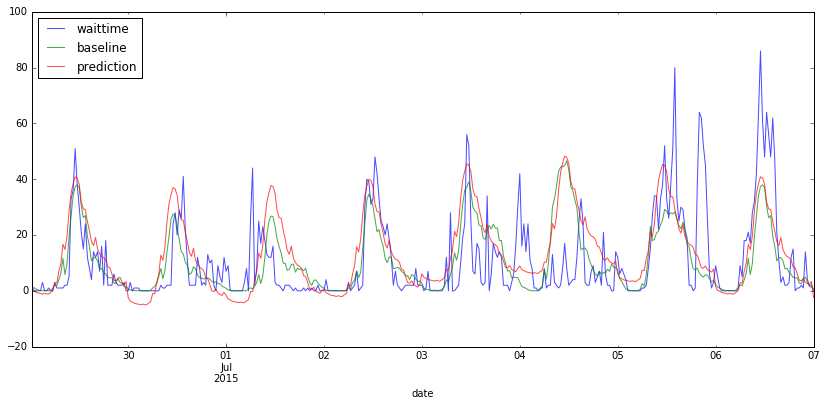

In [65]:
data = BorderData(dfnew, years=3)
model = LinearRegression(normalize=True, n_jobs=-1)
model.fit(data.X_train, data.y_train)
data.predict(model)
data.print_metrics(model)
data.plot('6/29/15', '7/7/15');

## This makes more sense.  Note that model tries to fit to baseline, but does a poor job, sometimes dropping below zero.